## SPAM Classification with NLP and NaiveBayes Models 

In [1]:
# Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 5]

import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud

import string
import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag, pos_tag_sents
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [23]:
# Loading the dataset
df = pd.read_csv('bases/spam.csv')
df = df.rename(columns={'Category':'class', 'Message':'text'})

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

In [24]:
# Checking the shape of the datasets
print(f'Shape train dataset: {df_train.shape[0]}')
print(f'Shape test dataset: {df_test.shape[0]}')

Shape train dataset: 4457
Shape test dataset: 1115


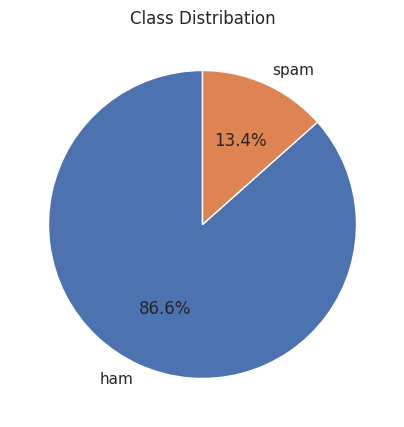

In [25]:
# Checking the class distribution
plt.pie(df_train['class'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribation')
plt.show()

We've noticed that we're dealing with unbalanced classes.

We can use the Oversampling or Undersampling

In [26]:
# For a analysis of the text, we will after remove the stopwords, punctuation and lowercase the text
def preprocessing(text):
    # Lowercasing the text
    text = text.lower()
    
    # Removing punctuation
    text = ''.join([word for word in text if word not in string.punctuation])
    
    # Tokenizing the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

df_train['text_processed'] = df_train['text'].apply(preprocessing)

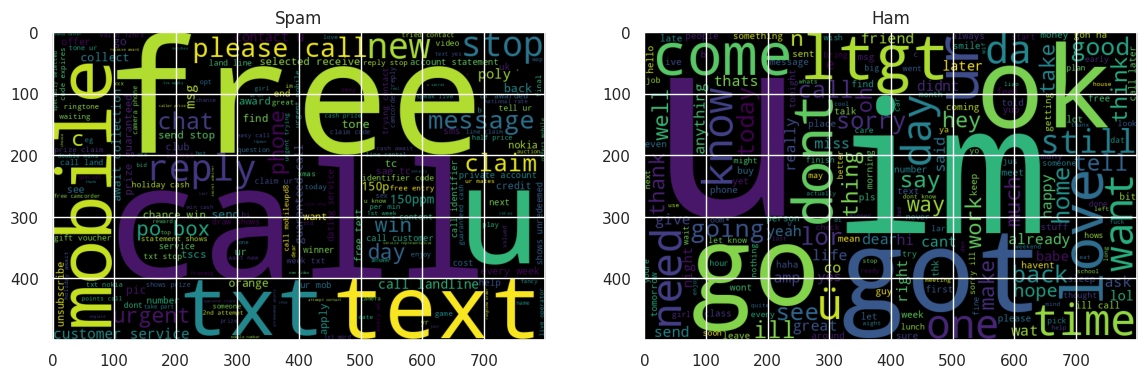

In [27]:
# WordCloud for spam and ham

plt.subplot(1, 2, 1)
wc_train = WordCloud(background_color='black', width=800, height=500)
wc_train.generate(str(' '.join(df_train[df_train['class'] == 'spam']['text_processed'])))
plt.imshow(wc_train)
plt.title('Spam')

plt.subplot(1, 2, 2)
wc_test = WordCloud(background_color='black', width=800, height=500)
wc_test.generate(str(' '.join(df_train[df_train['class'] == 'ham']['text_processed'])))
plt.imshow(wc_test)
plt.title('Ham')
plt.show()

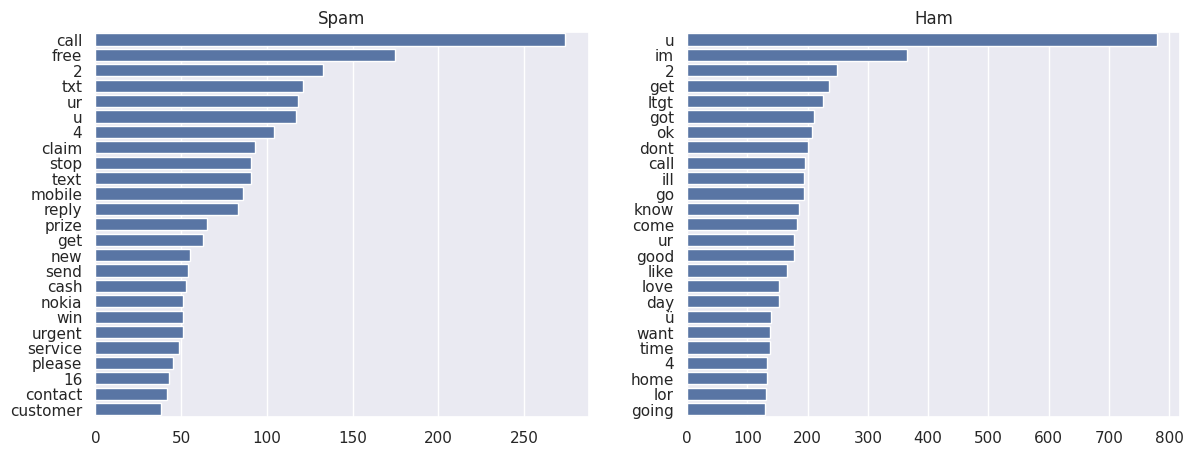

In [28]:
# Top 15 tokens most frequent for spam and ham using barplot
from collections import Counter

def get_most_common_words(text, n):
    tokens = word_tokenize(text)
    return Counter(tokens).most_common(n)

plt.subplot(1, 2, 1)
most_common_spam = get_most_common_words(' '.join(df_train[df_train['class'] == 'spam']['text_processed']), 25)
most_common_spam = dict(most_common_spam)
sns.barplot(x=list(most_common_spam.values()), y=list(most_common_spam.keys()))
plt.title('Spam')

plt.subplot(1, 2, 2)
most_common_ham = get_most_common_words(' '.join(df_train[df_train['class'] == 'ham']['text_processed']), 25)
most_common_ham = dict(most_common_ham)
sns.barplot(x=list(most_common_ham.values()), y=list(most_common_ham.keys())
)
plt.title('Ham')
plt.show()

In [35]:
# Label encoding class
df_train['class'] = df_train['class'].map({'ham':0, 'spam':1})
df_test['class'] = df_test['class'].map({'ham':0, 'spam':1})

# Stemming
def stemming(text):
    stemmer = SnowballStemmer('english')
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df_train['text_processed_stemming'] = df_train['text_processed'].apply(stemming)

df_train.head()

,class,text,text_processed,text_processed_stemming
184,0,"He will, you guys close?",guys close,guy close
2171,0,CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER ...,please come imin towndontmatter urgoin outl8rj...,pleas come imin towndontmatt urgoin outl8rjust...
5422,0,Ok k..sry i knw 2 siva..tats y i askd..,ok ksry knw 2 sivatats askd,ok ksri knw 2 sivatat askd
4113,0,"I'll see, but prolly yeah",ill see prolly yeah,ill see prolli yeah
4588,0,"I'll see if I can swing by in a bit, got some ...",ill see swing bit got things take care firsg,ill see swing bit got thing take care firsg


Function CountVectorizer and Tfidf Example 

In [30]:
text = 'hello everyone, this is a test'
count_vectorizer_example = CountVectorizer()
X_example_count = count_vectorizer_example.fit_transform([text])

tfidf_transformer_example = TfidfTransformer()
X_example_tfidf = tfidf_transformer_example.fit_transform(X_example_count)

print(f'Example text: {text}')
print(f'Vocabulary: {count_vectorizer_example.vocabulary_}')
print(f'Count Vectorizer: {X_example_count.toarray()}')
print(f'Tfidf Transformer: {X_example_tfidf.toarray()}')

Example text: hello everyone, this is a test
Vocabulary: {'hello': 1, 'everyone': 0, 'this': 4, 'is': 2, 'test': 3}
Count Vectorizer: [[1 1 1 1 1]]
Tfidf Transformer: [[0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]]


In [36]:
# Pipeline the model
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipeline.fit(df_train['text_processed_stemming'], df_train['class'])

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [47]:
predict_proba[:, 1]

array([0.00310829, 0.00017496, 0.00068693, ..., 0.14773942, 0.04619635,
       0.02374537])

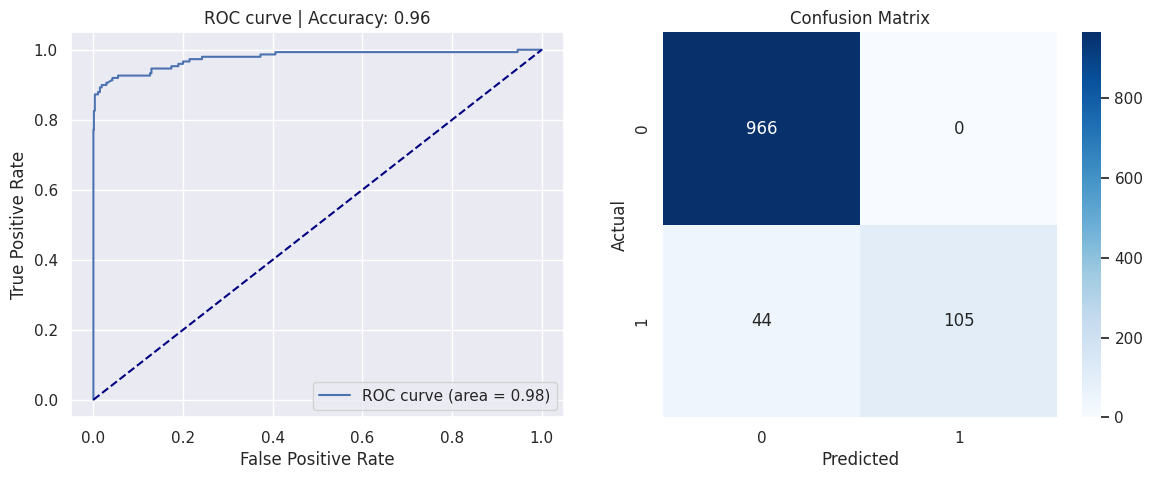

In [54]:
# Evaluation the model using plot confusion matrix and roc curve
df_test['text_processed'] = df_test['text'].apply(preprocessing)
df_test['text_processed_stemming'] = df_test['text_processed'].apply(stemming)

predict_proba = pipeline.predict_proba(df_test['text_processed_stemming'])
predict = pipeline.predict(df_test['text_processed_stemming'])

accuracy = metrics.accuracy_score(df_test['class'], predict)


fpr, tpr, thresholds = metrics.roc_curve(df_test['class'], predict_proba[:, 1], pos_label=1)




plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve | Accuracy: %.2f' % accuracy)
plt.legend()

plt.subplot(1, 2, 2)
cm = metrics.confusion_matrix(df_test['class'], pipeline.predict(df_test['text_processed_stemming']))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()